# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(pd.Series.drop_duplicates(df_train[i], inplace=False)) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
0                   Среднее специальное
1                               Среднее
2                      Неполное среднее
3                                Высшее
48                  Неоконченное высшее
188      Два и более высших образования
12024                    Ученая степень
Name: EDUCATION, dtype: object


MARITAL_STATUS
0         Состою в браке
5       Гражданский брак
6            Разведен(а)
10    Не состоял в браке
47          Вдовец/Вдова
Name: MARITAL_STATUS, dtype: object


GEN_INDUSTRY
0                                        Торговля
2                       Информационные технологии
3                                     Образование
4                          Государственная служба
6                                    Другие сферы
7                              Сельское хозяйство
8                                 Здравоохранение
12      Металлургия/Промышленность/Машиностроение
16                                            NaN
17            Коммунальное хоз-во/До

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Да есть, об этом говорит вывод df.info()

+ GEN_INDUSTRY                  27420 non-null object
+ GEN_TITLE                     27420 non-null object
+ ORG_TP_STATE                  27420 non-null object
+ ORG_TP_FCAPITAL               27425 non-null object
+ JOB_DIR                       27420 non-null object
+ TP_PROVINCE                   29543 non-null object
+ WORK_TIME                     27416 non-null float64
+ PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

Тогда как общее число записей 30133

Что можно сделать с данными:

GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR - Важные данные. Если человек не работает SOCSTATUS_WORK_FL=0 можно заполнить значением "Не работает" - получится дубль колонки после dummies

TP_PROVINCE    - Если предположить, что человек не брал кредит ранее - это полезные данные. В этом случае возможно надо ввести пустое значение, но лучше добавить новую колонку обращается ли человек впервые за кредитом и двумя значениями 0 и 1. Эту колонку тогда можно будет удалить

WORK_TIME      - Для всех неработающих заполняем нулем (SOCSTATUS_WORK_FL=0)

PREVIOUS_CARD_NUM_UTILIZED - заполняем нулем, если карт не было

Имеются еще столбцы с NaN:

REGION_NM - NaN можно заполнить по адресным колонкам.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?
Для колонок ниже можно сделать отдельные колонки вызовом get_dummies:
+ EDUCATION
+ MARITAL_STATUS
+ GEN_INDUSTRY
+ GEN_TITLE
+ ORG_TP_STATE
+ ORG_TP_FCAPITAL
+ JOB_DIR
+ FAMILY_INCOME
+ REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE и FACT_ADDRESS_PROVINCE - это субъекты РФ. По сути ограниченный набор.
+ TP_PROVINCE - если заполнено, то человек уже обращался, если нет, то не обращался - выделить отдельную колонку
+ REGION_NM - после заполнения на основании адресов получится полноценный справочник и его можно будет категоризировать

Так как справочники большие, например адреса, может получиться огромное количество колонок. Чтобы избежать такой ситуации можно каждому уникальному значению присвоить индекс и просто заменить строки индексами. Колонку преобразовать в целочисленную

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [15]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output.loc[(df_output['GEN_INDUSTRY'].isnull()), 'GEN_INDUSTRY'] = u'Не работает'
    df_output.loc[(df_output['GEN_TITLE'].isnull()), 'GEN_TITLE'] = u'Не работает'
    df_output.loc[(df_output['ORG_TP_STATE'].isnull()), 'ORG_TP_STATE'] = u'Не работает'
    df_output.loc[(df_output['ORG_TP_FCAPITAL'].isnull()), 'ORG_TP_FCAPITAL'] = u'Не работает'
    df_output.loc[(df_output['JOB_DIR'].isnull()), 'JOB_DIR'] = u'Не работает'

    df_output['CREDIT_CLIENT'] = ~df_output['TP_PROVINCE'].isnull()
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    df_output[df_output.REGION_NM.isnull()].fillna(value=df_input.REGION_NM[~df_input['REGION_NM'].isnull() &
                                                         (df_input['FACT_ADDRESS_PROVINCE'] == df_output['FACT_ADDRESS_PROVINCE'])].iloc[0], inplace=True)
    print(df_output['REGION_NM'].describe())
    df_output = df_output.drop(['TP_PROVINCE'], axis=1)
   
    education = list(set(df_output['EDUCATION']))
    df_output['EDUCATION'] = df_output.EDUCATION.apply(lambda r: education.index(r))
    mStatus = list(set(df_output['MARITAL_STATUS']))
    df_output['MARITAL_STATUS'] = df_output.MARITAL_STATUS.apply(lambda r: mStatus.index(r))    
    
    gIndustry = list(set(df_output['GEN_INDUSTRY']))
    df_output['GEN_INDUSTRY'] = df_output.GEN_INDUSTRY.apply(lambda r: gIndustry.index(r))   
    
    gTitle = list(set(df_output['GEN_TITLE']))
    df_output['GEN_TITLE'] = df_output.GEN_TITLE.apply(lambda r: gTitle.index(r)) 
    
    orgState = list(set(df_output['ORG_TP_STATE']))
    df_output['ORG_TP_STATE'] = df_output.ORG_TP_STATE.apply(lambda r: orgState.index(r))     
    
    fCapital = list(set(df_output['ORG_TP_FCAPITAL']))
    df_output['ORG_TP_FCAPITAL'] = df_output.ORG_TP_FCAPITAL.apply(lambda r: fCapital.index(r))      
    
    jobDir = list(set(df_output['JOB_DIR']))
    df_output['JOB_DIR'] = df_output.JOB_DIR.apply(lambda r: jobDir.index(r))      
    
    fIncome = list(set(df_output['FAMILY_INCOME']))
    df_output['FAMILY_INCOME'] = df_output.FAMILY_INCOME.apply(lambda r: fIncome.index(r))      

    regions = list(set().union(
        df_output['REG_ADDRESS_PROVINCE'], 
        df_output['FACT_ADDRESS_PROVINCE'], 
        df_output['POSTAL_ADDRESS_PROVINCE']))
    df_output['REG_ADDRESS_PROVINCE'] = df_output.REG_ADDRESS_PROVINCE.apply(lambda r: regions.index(r))  
    df_output['FACT_ADDRESS_PROVINCE'] = df_output.FACT_ADDRESS_PROVINCE.apply(lambda r: regions.index(r))  
    df_output['POSTAL_ADDRESS_PROVINCE'] = df_output.POSTAL_ADDRESS_PROVINCE.apply(lambda r: regions.index(r))  
    
    regionsNM = list(set(df_output['REGION_NM']))
    df_output['REGION_NM'] = df_output.REGION_NM.apply(lambda r: regionsNM.index(r))
    
    df_output = pd.get_dummies(df_output, columns=[
#         'EDUCATION',
#         'MARITAL_STATUS',
#         'GEN_INDUSTRY',
#         'GEN_TITLE',
#         'ORG_TP_STATE',
#         'ORG_TP_FCAPITAL',
#         'JOB_DIR',
#         'FAMILY_INCOME',
#         'REG_ADDRESS_PROVINCE',
#         'FACT_ADDRESS_PROVINCE',
#         'POSTAL_ADDRESS_PROVINCE',
#         'REGION_NM',
        'CREDIT_CLIENT'])
    return df_output

In [16]:
df_preproc = df.pipe(preproc_data)
print(df_preproc.info())
print(df_preproc.head())
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

/home/dsaponenko/.local/lib/python2.7/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


count     30131
unique       11
top       ЮЖНЫЙ
freq       4248
Name: REGION_NM, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               3

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [17]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [18]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)


/home/dsaponenko/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train, y_train)
treeClassifierPredict = treeClassifier.predict(X_train_test)
treeClassifierPredictProba = treeClassifier.predict_proba(X_train_test)

forestClassifier = RandomForestClassifier()
forestClassifier.fit(X_train, y_train)
forestClassifierPredict = forestClassifier.predict(X_train_test)
forestClassifierPredictProba = forestClassifier.predict_proba(X_train_test)

logisticClassifier = LogisticRegression()
logisticClassifier.fit(X_train, y_train)
logisticClassifierPredict = logisticClassifier.predict(X_train_test)
logisticClassifierPredictProba = logisticClassifier.predict_proba(X_train_test)

In [20]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('treeClassifierPredict')
print('accuracy', accuracy_score(y_train_test, treeClassifierPredict))
print('precision', precision_score(y_train_test, treeClassifierPredict))
print('recall', recall_score(y_train_test, treeClassifierPredict))

print('\nforestClassifierPredict')
print('accuracy', accuracy_score(y_train_test, forestClassifierPredict))
print('precision', precision_score(y_train_test, forestClassifierPredict))
print('recall', recall_score(y_train_test, forestClassifierPredict))

print('\nlogisticClassifierPredict')
print('accuracy', accuracy_score(y_train_test, logisticClassifierPredict))
print('precision', precision_score(y_train_test, logisticClassifierPredict))
print('recall', recall_score(y_train_test, logisticClassifierPredict))

treeClassifierPredict
('accuracy', 0.7911101379461353)
('precision', 0.18282988871224165)
('recall', 0.2072072072072072)

forestClassifierPredict
('accuracy', 0.8749726297350559)
('precision', 0.19230769230769232)
('recall', 0.009009009009009009)

logisticClassifierPredict
('accuracy', 0.8776001751696957)
('precision', 0.25)
('recall', 0.0036036036036036037)


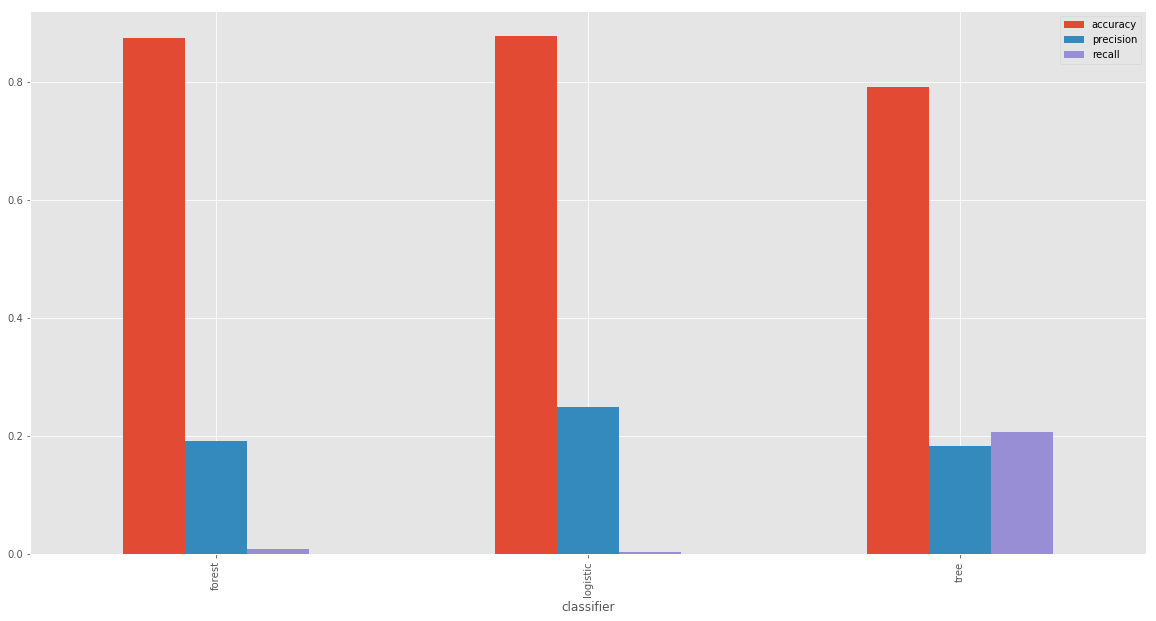

In [21]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

statDataFrame = pd.DataFrame(data={
    'classifier': [
        'tree', 'forest', 'logistic'
    ], 
    'accuracy': [
        accuracy_score(y_train_test, treeClassifierPredict),
        accuracy_score(y_train_test, forestClassifierPredict),
        accuracy_score(y_train_test, logisticClassifierPredict)
    ], 
    'precision': [
        precision_score(y_train_test, treeClassifierPredict),
        precision_score(y_train_test, forestClassifierPredict),
        precision_score(y_train_test, logisticClassifierPredict)
    ], 
    'recall': [
        recall_score(y_train_test, treeClassifierPredict),
        recall_score(y_train_test, forestClassifierPredict),
        recall_score(y_train_test, logisticClassifierPredict)
    ]})

fig, ax = plt.subplots(figsize=(20,10))
statDataFrame.pivot_table(statDataFrame, index=['classifier']).plot(kind='bar', stacked=False, ax=ax)

roc_auc_srore
('tree', 0.539545777083165)
('forest', 0.6069101254794176)
('logistic', 0.6541622879110416)


(-0.01, 1.01)

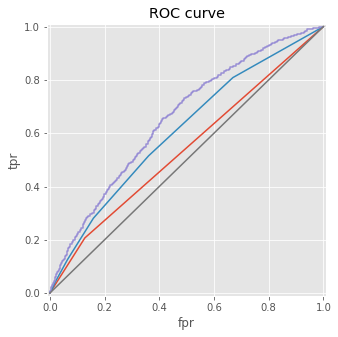

In [22]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

print('roc_auc_srore')
print('tree', roc_auc_score(y_train_test, treeClassifierPredictProba[:,1]))
print('forest', roc_auc_score(y_train_test, forestClassifierPredictProba[:,1]))
print('logistic', roc_auc_score(y_train_test, logisticClassifierPredictProba[:,1]))

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_train_test, treeClassifierPredictProba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_train_test, forestClassifierPredictProba[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_train_test, logisticClassifierPredictProba[:,1])
plt.plot(fpr, tpr, label='tree')
plt.plot(fpr2, tpr2, label='forest')
plt.plot(fpr3, tpr3, label='logistic')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [23]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

classifiers = {
    'tree': DecisionTreeClassifier(), 
    'forest': RandomForestClassifier(),
    'logistic': LogisticRegression()}

splitCount = 10
cv = StratifiedKFold(n_splits=splitCount, shuffle=True, random_state=123)

for classifierName, classifier in classifiers.iteritems():
    roc_auc = 0
    for train_index, test_index in cv.split(X, y):
        X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
        y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
        classifier.fit(X_train_kfold, y_train_kfold)
        classifierPredictProba = classifier.predict_proba(X_test_kfold)
        roc_auc += roc_auc_score(y_test_kfold, classifierPredictProba[:,1])
    roc_auc = roc_auc / splitCount    
    print(classifierName, roc_auc)

('tree', 0.5398515816253333)
('forest', 0.5959387787899075)


/home/dsaponenko/.local/lib/python2.7/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


('logistic', 0.6559350968837057)


In [24]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

classifier = LogisticRegression()
classifier.fit(X, y)
classifierPredictProba = classifier.predict_proba(X_test)

In [25]:
# Померить roc_auc на тесте

roc_auc_score(y_test, classifierPredictProba[:,1])

0.6348935084672167

(-0.01, 1.01)

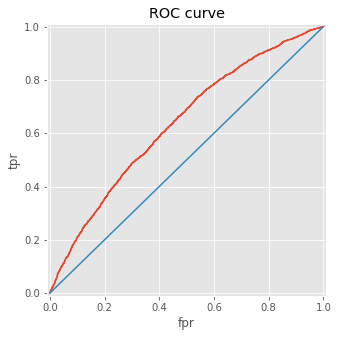

In [26]:
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, classifierPredictProba[:,1])
plt.plot(fpr, tpr, label='tree')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))